<h1 style="font-weight:bold;text-align:center"> Bank Marketing Campaign </h1>

***

<p style="text-align:center;font-weight:600">&emsp;Sean Kristian Anderson&emsp;||&emsp;Davis Sebastian&emsp;</p>
<p style="text-align:center;">DTIDS-0206 Final Project by Alpha Team</p>

***

<p style="font-weight:500">Table Of Contents</p>

1. [Business Problem Understanding](#1-business-problem-understanding)       
    1.1. [Context](#11-context) \
    1.2. [Target](#12-target) \
    1.3. [Problem Statement](#13-problem-statement) \
    1.4. [Goals](#14-goals) \
    1.5. [Analytical Approach](#15-analytical-approach) \
    1.6. [Metric Evaluation](#16-metric-evaluation)
2. [Data Understanding](#data-understanding) \
    2.1. [Attribute Information](#attribute-information)      
    2.2. [Descriptive Statistics](#descriptive-statistics)     
3. [Exploratory Data Analysis (EDA)](#exploratory-data-analysis-eda) \
    3.1. Data Distribution
4. [Data Preprocessing](#data-preprocessing)       
    4.1. [Duplicated Values](#duplicated-values)      
    4.2. [Missing Values](#missing-values)     
    4.3. [Outliers](#outliers)
5. [Modeling & Evaluation](#methodology)        
    5.1. [Modeling](#modeling)
6. [Summary](#conclusion-and-recommendation)        
    6.1. [Conclusion](#conclusion)     
    6.2. [Recommendation](#recommendation)     



Tableau:

Slide Presentation: <a href src="https://www.canva.com/design/DAGeScCufiI/OtTsdTuXp_rSrNaKOxwcsQ/edit?utm_content=DAGeScCufiI&utm_campaign=designshare&utm_medium=link2&utm_source=sharebutton">Click Here</a>

## 1. Business Problem Understanding

### 1.1. Context

A Portuguese retail bank offers term deposit products, which are one of the popular investment services in the banking sector. A term deposit involves customers depositing a specific sum of money for a fixed period, with the promise of a guaranteed interest rate upon maturity. This product allows the bank to secure stable funds for a defined term, providing a predictable source of liquidity and facilitating better fund allocation planning.

Given these advantages, the bank aims to grow the customer base for its term deposit offerings. The strategy to achieve this involves reaching out to potential customers directly through phone calls.

### 1.2. Target

- 0: client won't subscribe a term deposit
- 1: client will subscribe a term deposit

### 1.3. Problem Statement

Through phone calls, the bank can provide more detailed information about the term deposit product, answer customer questions directly, and reassure them about the benefits and security of the product. This approach also incurs lower costs compared to inorganic advertisements. However, the downside of this method is that it requires significant time and effort. Conversion rates are typically low, and without proper predictions, customer service may waste time calling numerous customers, with only a few ultimately deciding to make a deposit.

### 1.4. Goals

Based on the issue outlined above, the company aims to develop the capability to identify customers with a high likelihood of subscribing to term deposits, allowing them to secure as many term deposits as quickly as possible for operational purposes. Additionally, the company seeks to uncover any patterns among customers who are likely to make a deposit and determine the most effective strategies for reaching out to them, based on the available data.

### 1.5. Analytical Approach

We will begin by analyzing the data to uncover patterns that distinguish customers who are likely to make a deposit from those who are not. Based on these insights, we will develop targeted strategies for approaching potential customers. Importantly, we will build a classification model that will enable the bank to predict the probability of a customer making a deposit or not.

### 1.6. Metric Evaluation

Assumptions:
- Telemarketing cost: € 1.5 ([Statista](https://www.statista.com/outlook/amo/advertising/direct-messaging-advertising/telemarketing/portugal#ad-spending))
- Term deposit: € 100

![Confusion Matrix](https://glassboxmedicine.com/wp-content/uploads/2019/02/confusion-matrix.png?w=816)

Type 1 Error (False Positive)
> Consequence: Incorrectly contacting a customer who is unlikely to deposit, leading to wasted time and increased telemarketing costs.

Type 2 Error (False Negative)
> Consequence: Failing to contact a customer who would have deposited.

In this scenario, a higher rate of False Negatives results in more significant profit losses because the bank misses out on potential depositors. Therefore, the F2 Score is the most suitable metric, as it places greater emphasis on reducing False Negatives while still considering False Positives. This approach ensures the bank reaches out to as many potential depositors as possible, even if it means contacting a few customers who ultimately will not deposit. Ultimately, this strategy helps the bank maximize deposits, which is the primary objective.

## 2. Data Understanding

### Attribute Information

<p style="font-weight:500">Attribute Related to Bank Client Data</p>

| Attribute | Data Type | Description | Expected Values |
| --- | --- | --- | --- |
| age | Integer | Age of users |
| job | Text (Categorical) | Type of Job | "admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown" |
| marital | Text (Categorical) | Marital status of users | "divorced","married","single","unknown" |
| education | Text (Categorical) | Education of users | "basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown" |
| default | Text (Categorical) | Has Credit in default? | "no","yes","unknown" |
| housing | Text (Categorical) | Has Housing Loan? | "no","yes","unknown" |
| loan | Text (Categorical) | Has Personal Loan? | "no","yes","unknown" |

<p style="font-weight:500">Attribute Related to Last Contact</p>

| Attribute | Data Type | Description | Expected Values |
| --- | --- | --- | --- |
| contact | Text (Categorical) | Last contact communication type | "cellular","telephone" |
| month | Text (Categorical) | Last contact month of year | "jan", "feb", "mar", "apr", "may", "june", "july", "aug", "sept", "oct", "nov", "dec" |
| day_of_week | Text (Categorical) | Last contact day of week | "mon","tue","wed","thu","fri" | 
| duration | Integer | Last contact duration |

Important note: this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

<p style="font-weight:500">Other Attribute</p>

| Attribute | Data Type | Description | Expected Values |
| --- | --- | --- | --- |
| campaign | Integer | Number of contacts performed during this campaign and for this client |
| pdays | Integer | Number of days passed after the client was last contacted from previous campaign |
| previous | Integer | Number of contacts performed before this campaign and for this client |
| poutcome | Text (Categorical) | Outcome of the previous marketing campaign | "failure","nonexistent","success" |

<p style="font-weight:500">Attribute Related to Social and Economic Contexts</p>

| Attribute | Data Type | Description |
| --- | --- | --- |
| emp.var.rate | Float | Employment variation rate |
| cons.price.idx | Float | Consumer price index |
| cons.conf.idx | Float | Consumer confidence index |
| euribor3m | Float | Euribor 3 month rate - daily indicator |
| nr.employed | Float | Number of employees - quarterly indicator |


Missing Attribute Values: There are several missing values in some categorical attributes, all coded with the "unknown" label. These missing values can be treated as a possible class label or using deletion or imputation techniques.

<p style="font-weight:500">Other</p>

| Attribute | Data Type | Description | Expected Values |
| --- | --- | --- | --- | 
| y | Text (Categorical) | Subscribed a term deposit (output) | "yes", "no" |

### 2.2. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Feature Engineering
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import RFE
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder, RobustScaler, KBinsDiscretizer, FunctionTransformer, StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer
import category_encoders as ce
from sklearn.decomposition import PCA

# Model Selection
from sklearn import metrics
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, f1_score, accuracy_score, recall_score, precision_score, roc_curve, roc_auc_score
from sklearn.model_selection import GridSearchCV,StratifiedKFold,train_test_split, cross_val_score, RandomizedSearchCV

# Imbalance Dataset
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN
from imblearn.ensemble import BalancedRandomForestClassifier

### 2.3. Import Data

In [2]:
df = pd.read_csv('../Dataset/bank-additional-full.csv', sep=';')
display(df.head(), df.tail())

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


### 2.4. Basic Exploration

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [4]:
pd.set_option('display.max_colwidth', None)

list_data_num = []
list_data_cat = []

for col in df.select_dtypes(exclude='object').columns:
    list_data_num.append([col, df[col].dtype, df[col].isnull().sum(), round(df[col].isnull().sum() / df.shape[0] * 100, 2),
                     df[col].nunique(), df[col].unique()])
    
for col in df.select_dtypes(include='object').columns:
    list_data_cat.append([col, df[col].dtype, sum(df[col] == 'unknown'), round((sum(df[col] == 'unknown') / df.shape[0]) * 100, 2),
                     df[col].nunique(), df[col].unique()])
    
display(
    pd.DataFrame(data=list_data_num, columns=['column', 'type', 'null', 'null_pct', 'unique', 'values']),
    pd.DataFrame(data=list_data_cat, columns=['column', 'type', 'null', 'null_pct', 'unique', 'values'])
)

,column,type,null,null_pct,unique,values
0,age,int64,0,0.0,78,"[56, 57, 37, 40, 45, 59, 41, 24, 25, 29, 35, 54, 46, 50, 39, 30, 55, 49, 34, 52, 58, 32, 38, 44, 42, 60, 53, 47, 51, 48, 33, 31, 43, 36, 28, 27, 26, 22, 23, 20, 21, 61, 19, 18, 70, 66, 76, 67, 73, 88, 95, 77, 68, 75, 63, 80, 62, 65, 72, 82, 64, 71, 69, 78, 85, 79, 83, 81, 74, 17, 87, 91, 86, 98, 94, 84, 92, 89]"
1,duration,int64,0,0.0,1544,"[261, 149, 226, 151, 307, 198, 139, 217, 380, 50, 55, 222, 137, 293, 146, 174, 312, 440, 353, 195, 38, 262, 342, 181, 172, 99, 93, 233, 255, 362, 348, 386, 73, 230, 208, 336, 365, 1666, 577, 366, 314, 160, 212, 188, 22, 616, 178, 355, 225, 266, 253, 179, 269, 135, 161, 787, 145, 449, 812, 164, 357, 232, 91, 273, 158, 177, 200, 176, 211, 214, 1575, 349, 337, 272, 193, 165, 1042, 20, 246, 529, 192, 1467, 180, 48, 213, 545, 583, 221, 426, 287, 197, 257, 229, 400, 190, 21, 300, 123, 325, 514, ...]"
2,campaign,int64,0,0.0,42,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 19, 18, 23, 14, 22, 25, 16, 17, 15, 20, 56, 39, 35, 42, 28, 26, 27, 32, 21, 24, 29, 31, 30, 41, 37, 40, 33, 34, 43]"
3,pdays,int64,0,0.0,27,"[999, 6, 4, 3, 5, 1, 0, 10, 7, 8, 9, 11, 2, 12, 13, 14, 15, 16, 21, 17, 18, 22, 25, 26, 19, 27, 20]"
4,previous,int64,0,0.0,8,"[0, 1, 2, 3, 4, 5, 6, 7]"
5,emp.var.rate,float64,0,0.0,10,"[1.1, 1.4, -0.1, -0.2, -1.8, -2.9, -3.4, -3.0, -1.7, -1.1]"
6,cons.price.idx,float64,0,0.0,26,"[93.994, 94.465, 93.918, 93.444, 93.798, 93.2, 92.756, 92.843, 93.075, 92.893, 92.963, 92.469, 92.201, 92.379, 92.431, 92.649, 92.713, 93.369, 93.749, 93.876, 94.055, 94.215, 94.027, 94.199, 94.601, 94.767]"
7,cons.conf.idx,float64,0,0.0,26,"[-36.4, -41.8, -42.7, -36.1, -40.4, -42.0, -45.9, -50.0, -47.1, -46.2, -40.8, -33.6, -31.4, -29.8, -26.9, -30.1, -33.0, -34.8, -34.6, -40.0, -39.8, -40.3, -38.3, -37.5, -49.5, -50.8]"
8,euribor3m,float64,0,0.0,316,"[4.857, 4.856, 4.855, 4.859, 4.86, 4.858, 4.864, 4.865, 4.866, 4.967, 4.961, 4.959, 4.958, 4.96, 4.962, 4.955, 4.947, 4.956, 4.966, 4.963, 4.957, 4.968, 4.97, 4.965, 4.964, 5.045, 5.0, 4.936, 4.921, 4.918, 4.912, 4.827, 4.794, 4.76, 4.733, 4.7, 4.663, 4.592, 4.474, 4.406, 4.343, 4.286, 4.245, 4.223, 4.191, 4.153, 4.12, 4.076, 4.021, 3.901, 3.879, 3.853, 3.816, 3.743, 3.669, 3.563, 3.488, 3.428, 3.329, 3.282, 3.053, 1.811, 1.799, 1.778, 1.757, 1.726, 1.703, 1.687, 1.663, 1.65, 1.64, 1.629, 1.614, 1.602, 1.584, 1.574, 1.56, 1.556, 1.548, 1.538, 1.531, 1.52, 1.51, 1.498, 1.483, 1.479, 1.466, 1.453, 1.445, 1.435, 1.423, 1.415, 1.41, 1.405, 1.406, 1.4, 1.392, 1.384, 1.372, 1.365, ...]"
9,nr.employed,float64,0,0.0,11,"[5191.0, 5228.1, 5195.8, 5176.3, 5099.1, 5076.2, 5017.5, 5023.5, 5008.7, 4991.6, 4963.6]"


,column,type,null,null_pct,unique,values
0,job,object,330,0.80,12,"[housemaid, services, admin., blue-collar, technician, retired, management, unemployed, self-employed, unknown, entrepreneur, student]"
1,marital,object,80,0.19,4,"[married, single, divorced, unknown]"
2,education,object,1731,4.20,8,"[basic.4y, high.school, basic.6y, basic.9y, professional.course, unknown, university.degree, illiterate]"
3,default,object,8597,20.87,3,"[no, unknown, yes]"
4,housing,object,990,2.40,3,"[no, yes, unknown]"
5,loan,object,990,2.40,3,"[no, yes, unknown]"
6,contact,object,0,0.00,2,"[telephone, cellular]"
7,month,object,0,0.00,10,"[may, jun, jul, aug, oct, nov, dec, mar, apr, sep]"
8,day_of_week,object,0,0.00,5,"[mon, tue, wed, thu, fri]"
9,poutcome,object,0,0.00,3,"[nonexistent, failure, success]"


In [5]:
display(df.describe(), df.describe(include='object'))

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


In [6]:
print(f'Total rows that have at least 1 missing value: {df.isin(['unknown']).any(axis=1).sum()} ({round(df.isin(['unknown']).any(axis=1).sum() / df.shape[0] * 100, 2)})%')

Total rows that have at least 1 missing value: 10700 (25.98)%


In [7]:
print(f'Total duplicated rows: {df.duplicated().sum()} ({round(df.duplicated().sum() / df.shape[0] * 100, 2)})%')

Total duplicated rows: 12 (0.03)%


In [8]:
df = df.drop_duplicates()
print(f"Shape after removing duplicates: {df.shape}")
print(f"Total rows with at least one missing value after removing duplicates: {df.isnull().any(axis=1).sum()} ({round(df.isnull().any(axis=1).sum() / df.shape[0] * 100, 2)})%")

Shape after removing duplicates: (41176, 21)
Total rows with at least one missing value after removing duplicates: 0 (0.0)%


## 3. Exploratory Data Analysis (EDA)

### 3.1. Data Distribution

#### 3.1.1. Target Distribution

Text(0.5, 1.0, 'Target Proportion')

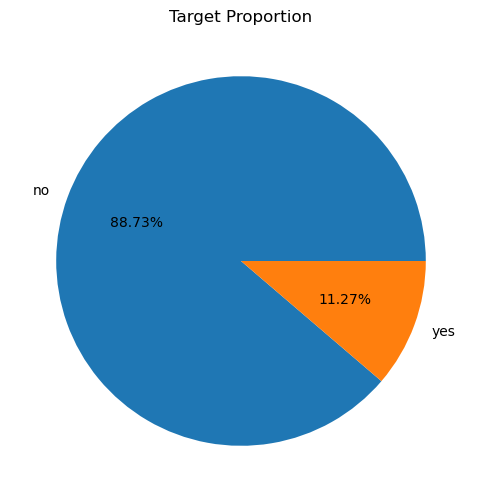

In [9]:
plt.figure(figsize=(10, 6))

plt.pie(
    x=df['y'].value_counts(),
    labels=df['y'].value_counts().index,
    autopct='%.2f%%'
)

plt.title('Target Proportion')

Notes:
- Our target is imbalance.
- In overall, the conversion rate from all data is 11.27%.

#### 3.1.2. Numerical Distribution

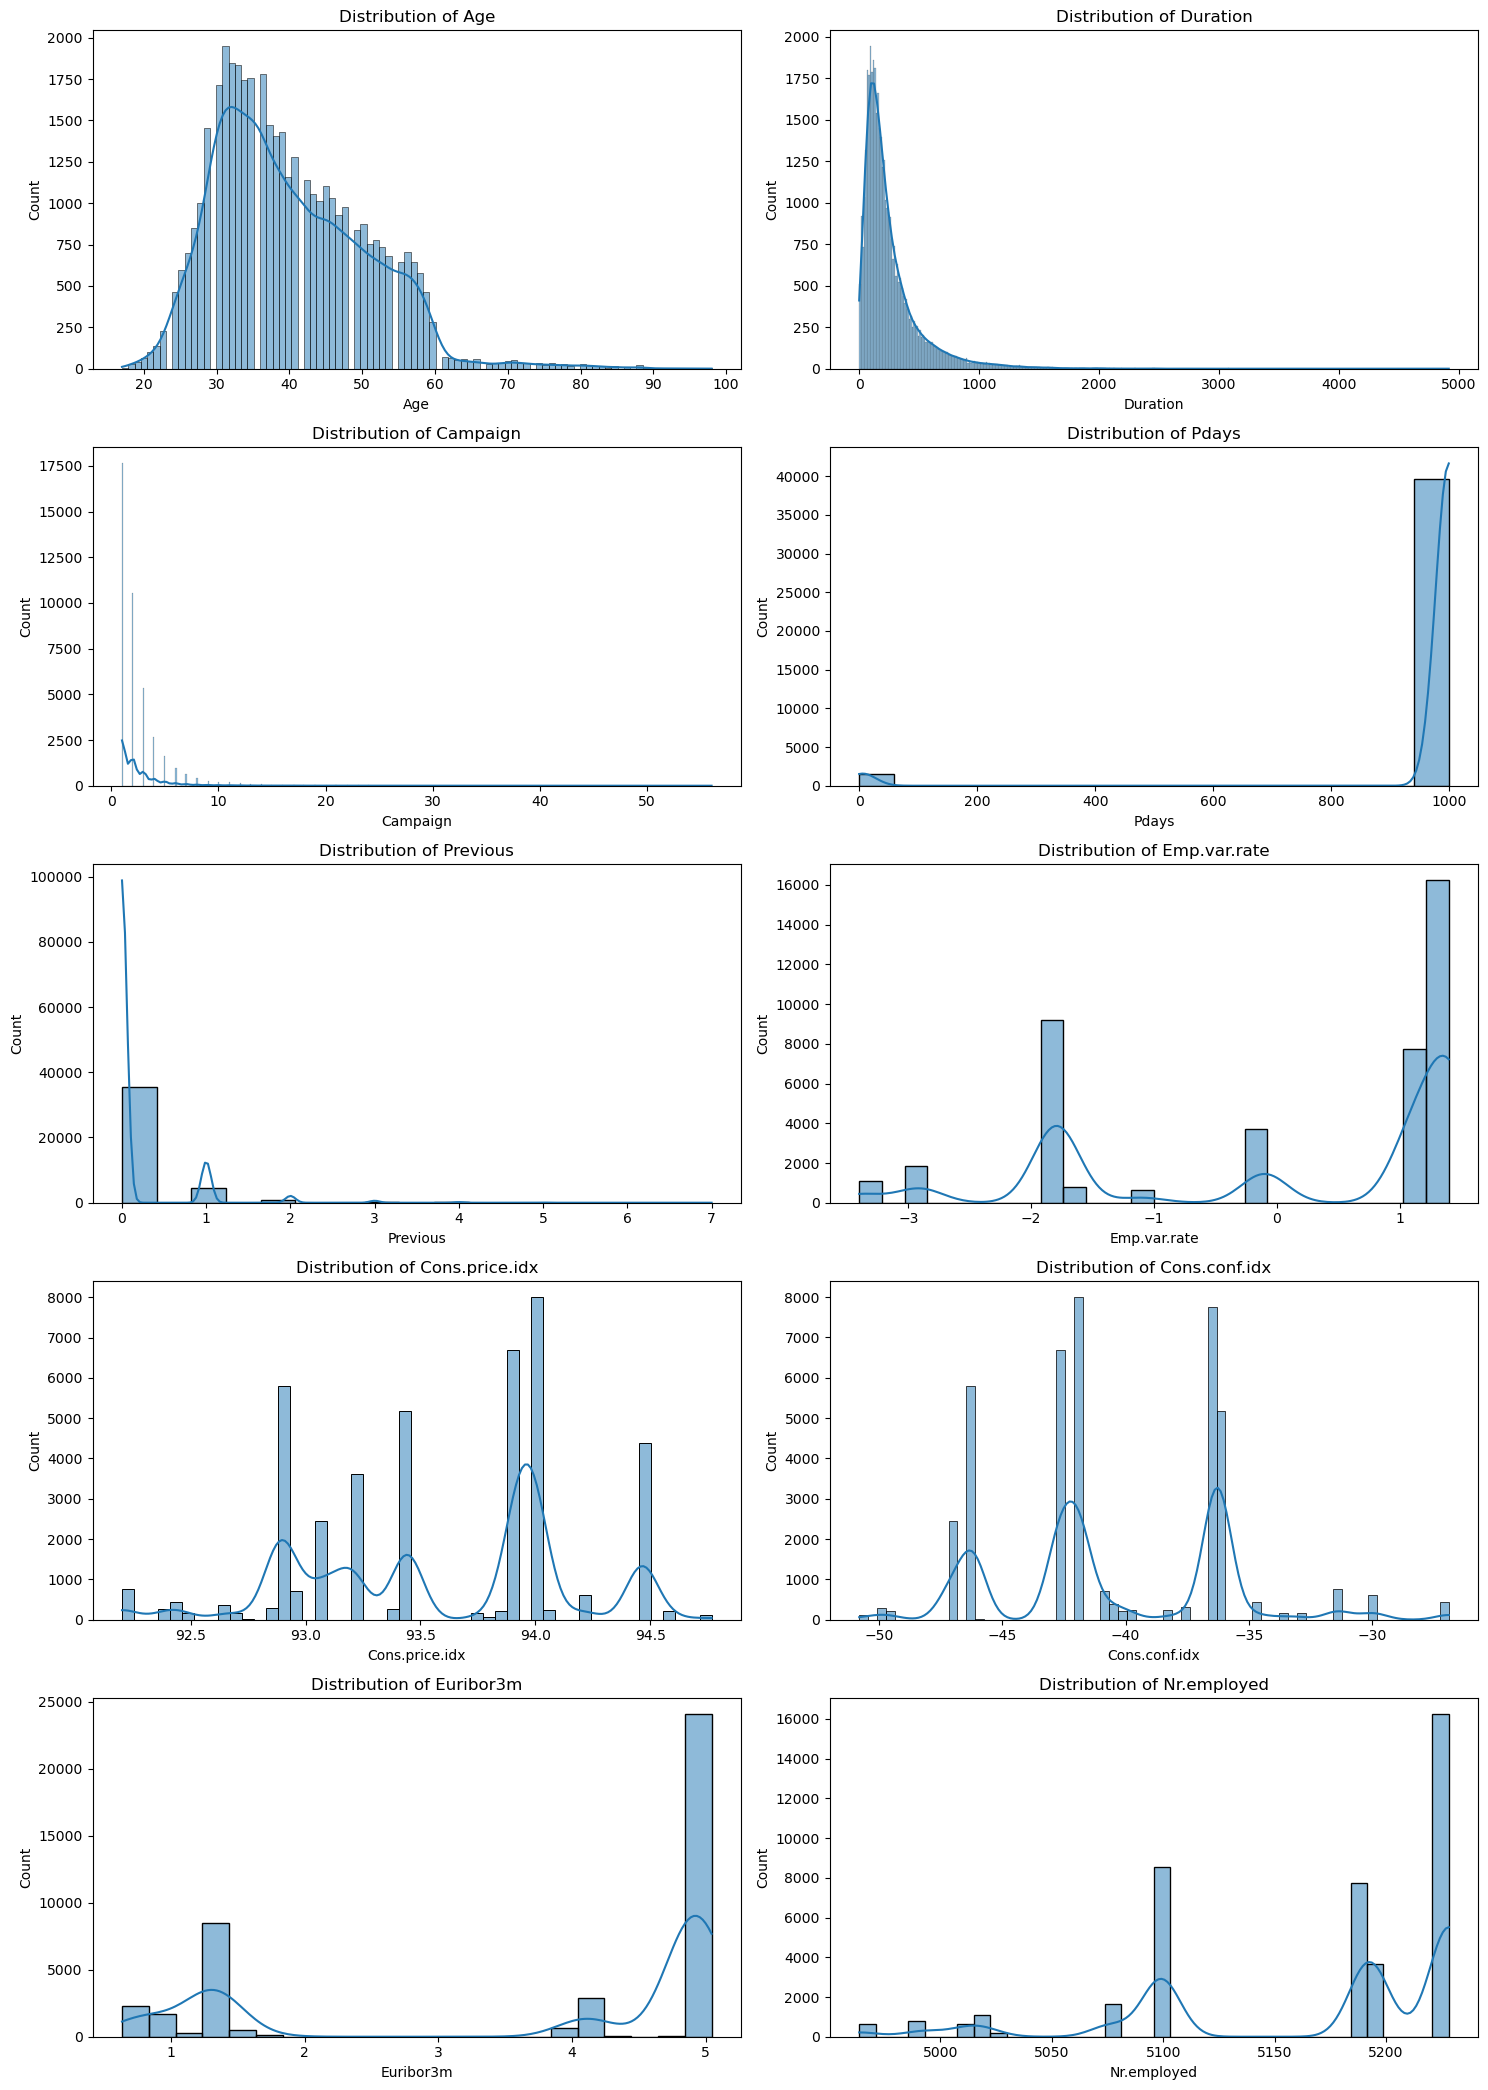

In [10]:
fig, ax = plt.subplots(nrows=5, ncols=2, figsize=(15, 21))

ax = ax.flatten()

for i, col in enumerate(df.select_dtypes(exclude='object').columns):
    sns.histplot(data=df, x=col, kde=True, ax=ax[i])
    ax[i].set_title(f'Distribution of {col.capitalize()}')
    ax[i].set_xlabel(f'{col.capitalize()}')
    ax[i].set_ylabel('Count')

plt.tight_layout()

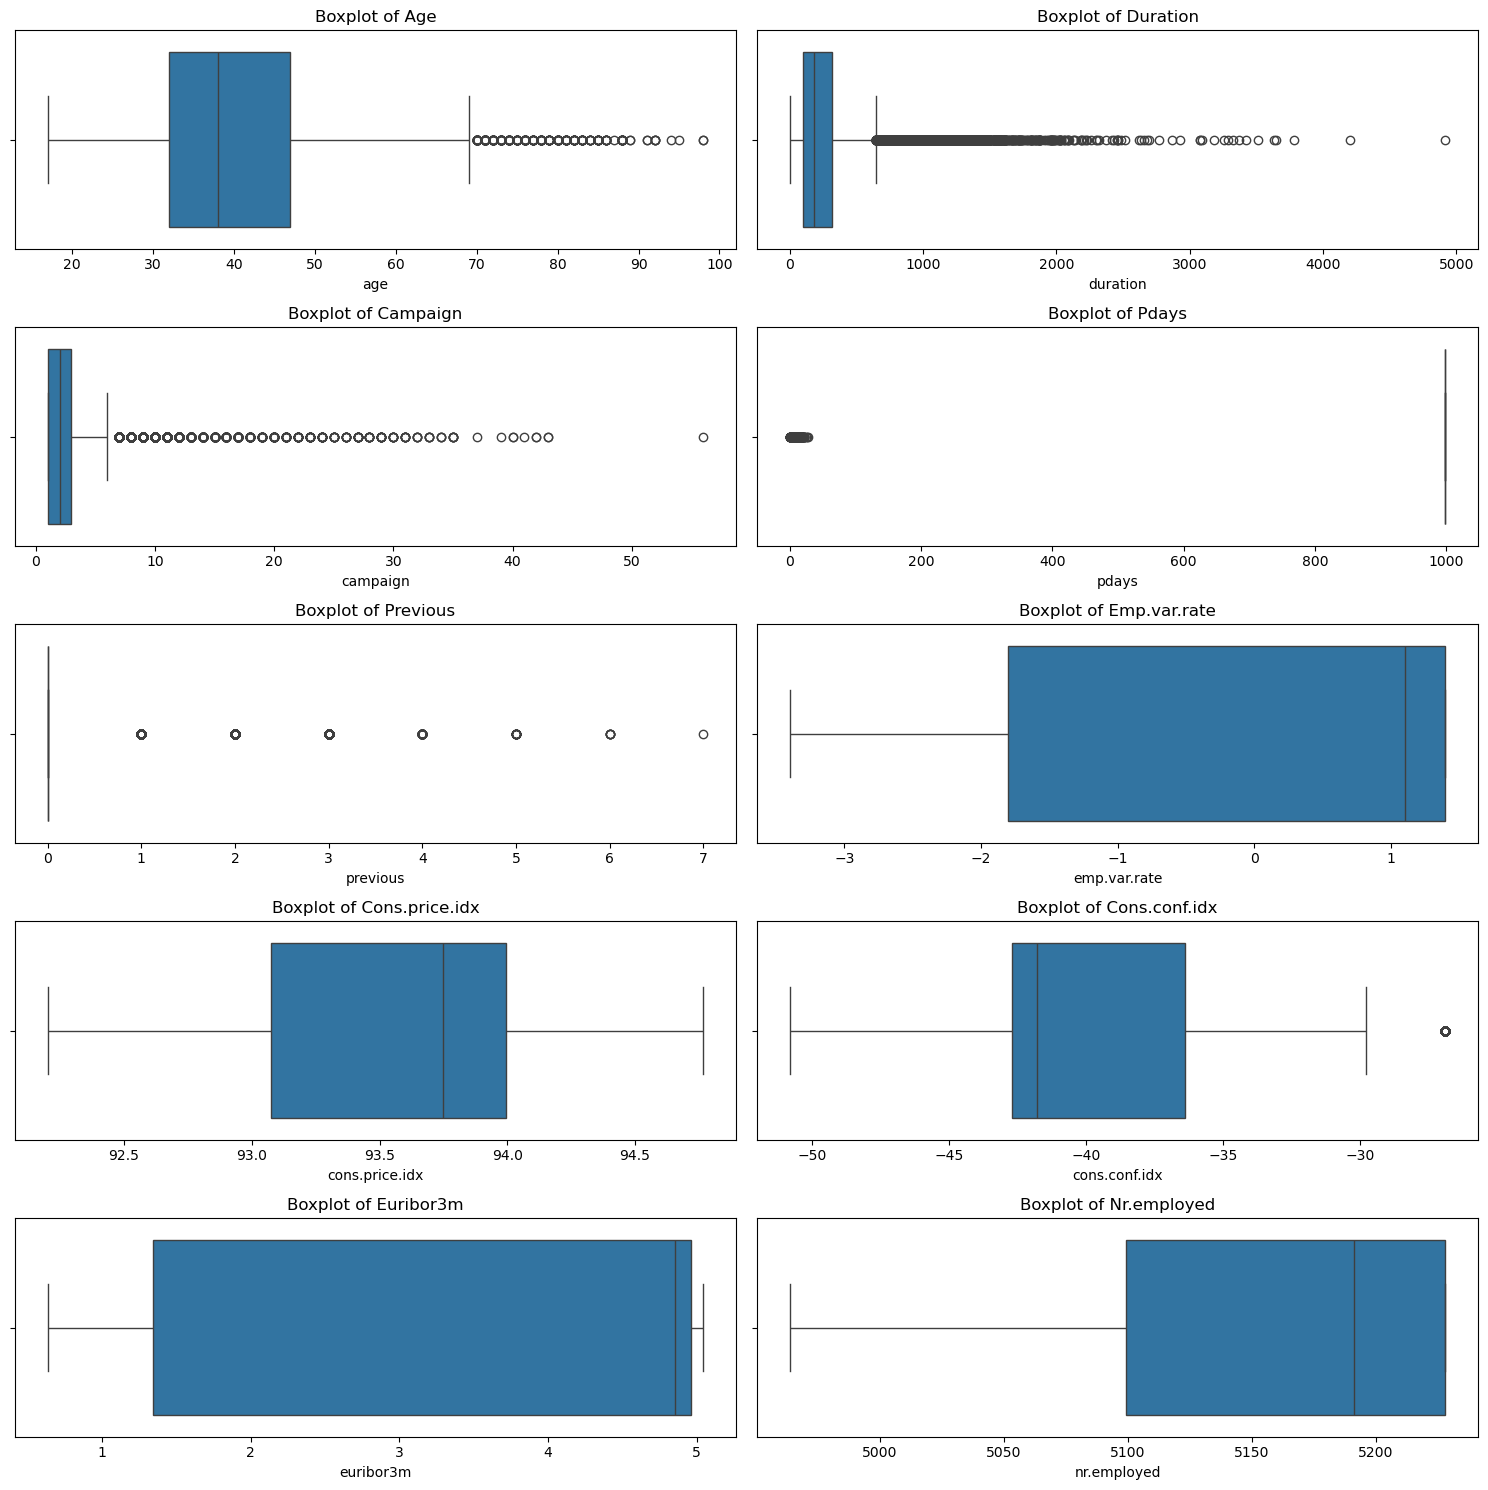

In [11]:
fig, ax = plt.subplots(nrows=5, ncols=2, figsize=(15, 15))

ax = ax.flatten()

for i, col in enumerate(df.select_dtypes(exclude='object').columns):
    sns.boxplot(data=df, x=col, ax=ax[i])
    ax[i].set_title(f'Boxplot of {col.capitalize()}')

plt.tight_layout()

Notes:
* Based on the plots above, many of our numerical distribution are highly skewed.
* The data point is also make sense, for example age = 17, several banks offered term deposit also for age < 18.
* Except the duration, because there's a few data where duration is above 3000 seconds (50 minutes), but since we want to make real prediction, we will just drop this column.
* Rather than dropping the outliers, we can use data transformation to make the distribution looks more normal.

#### 3.1.3. Categorical Distribution

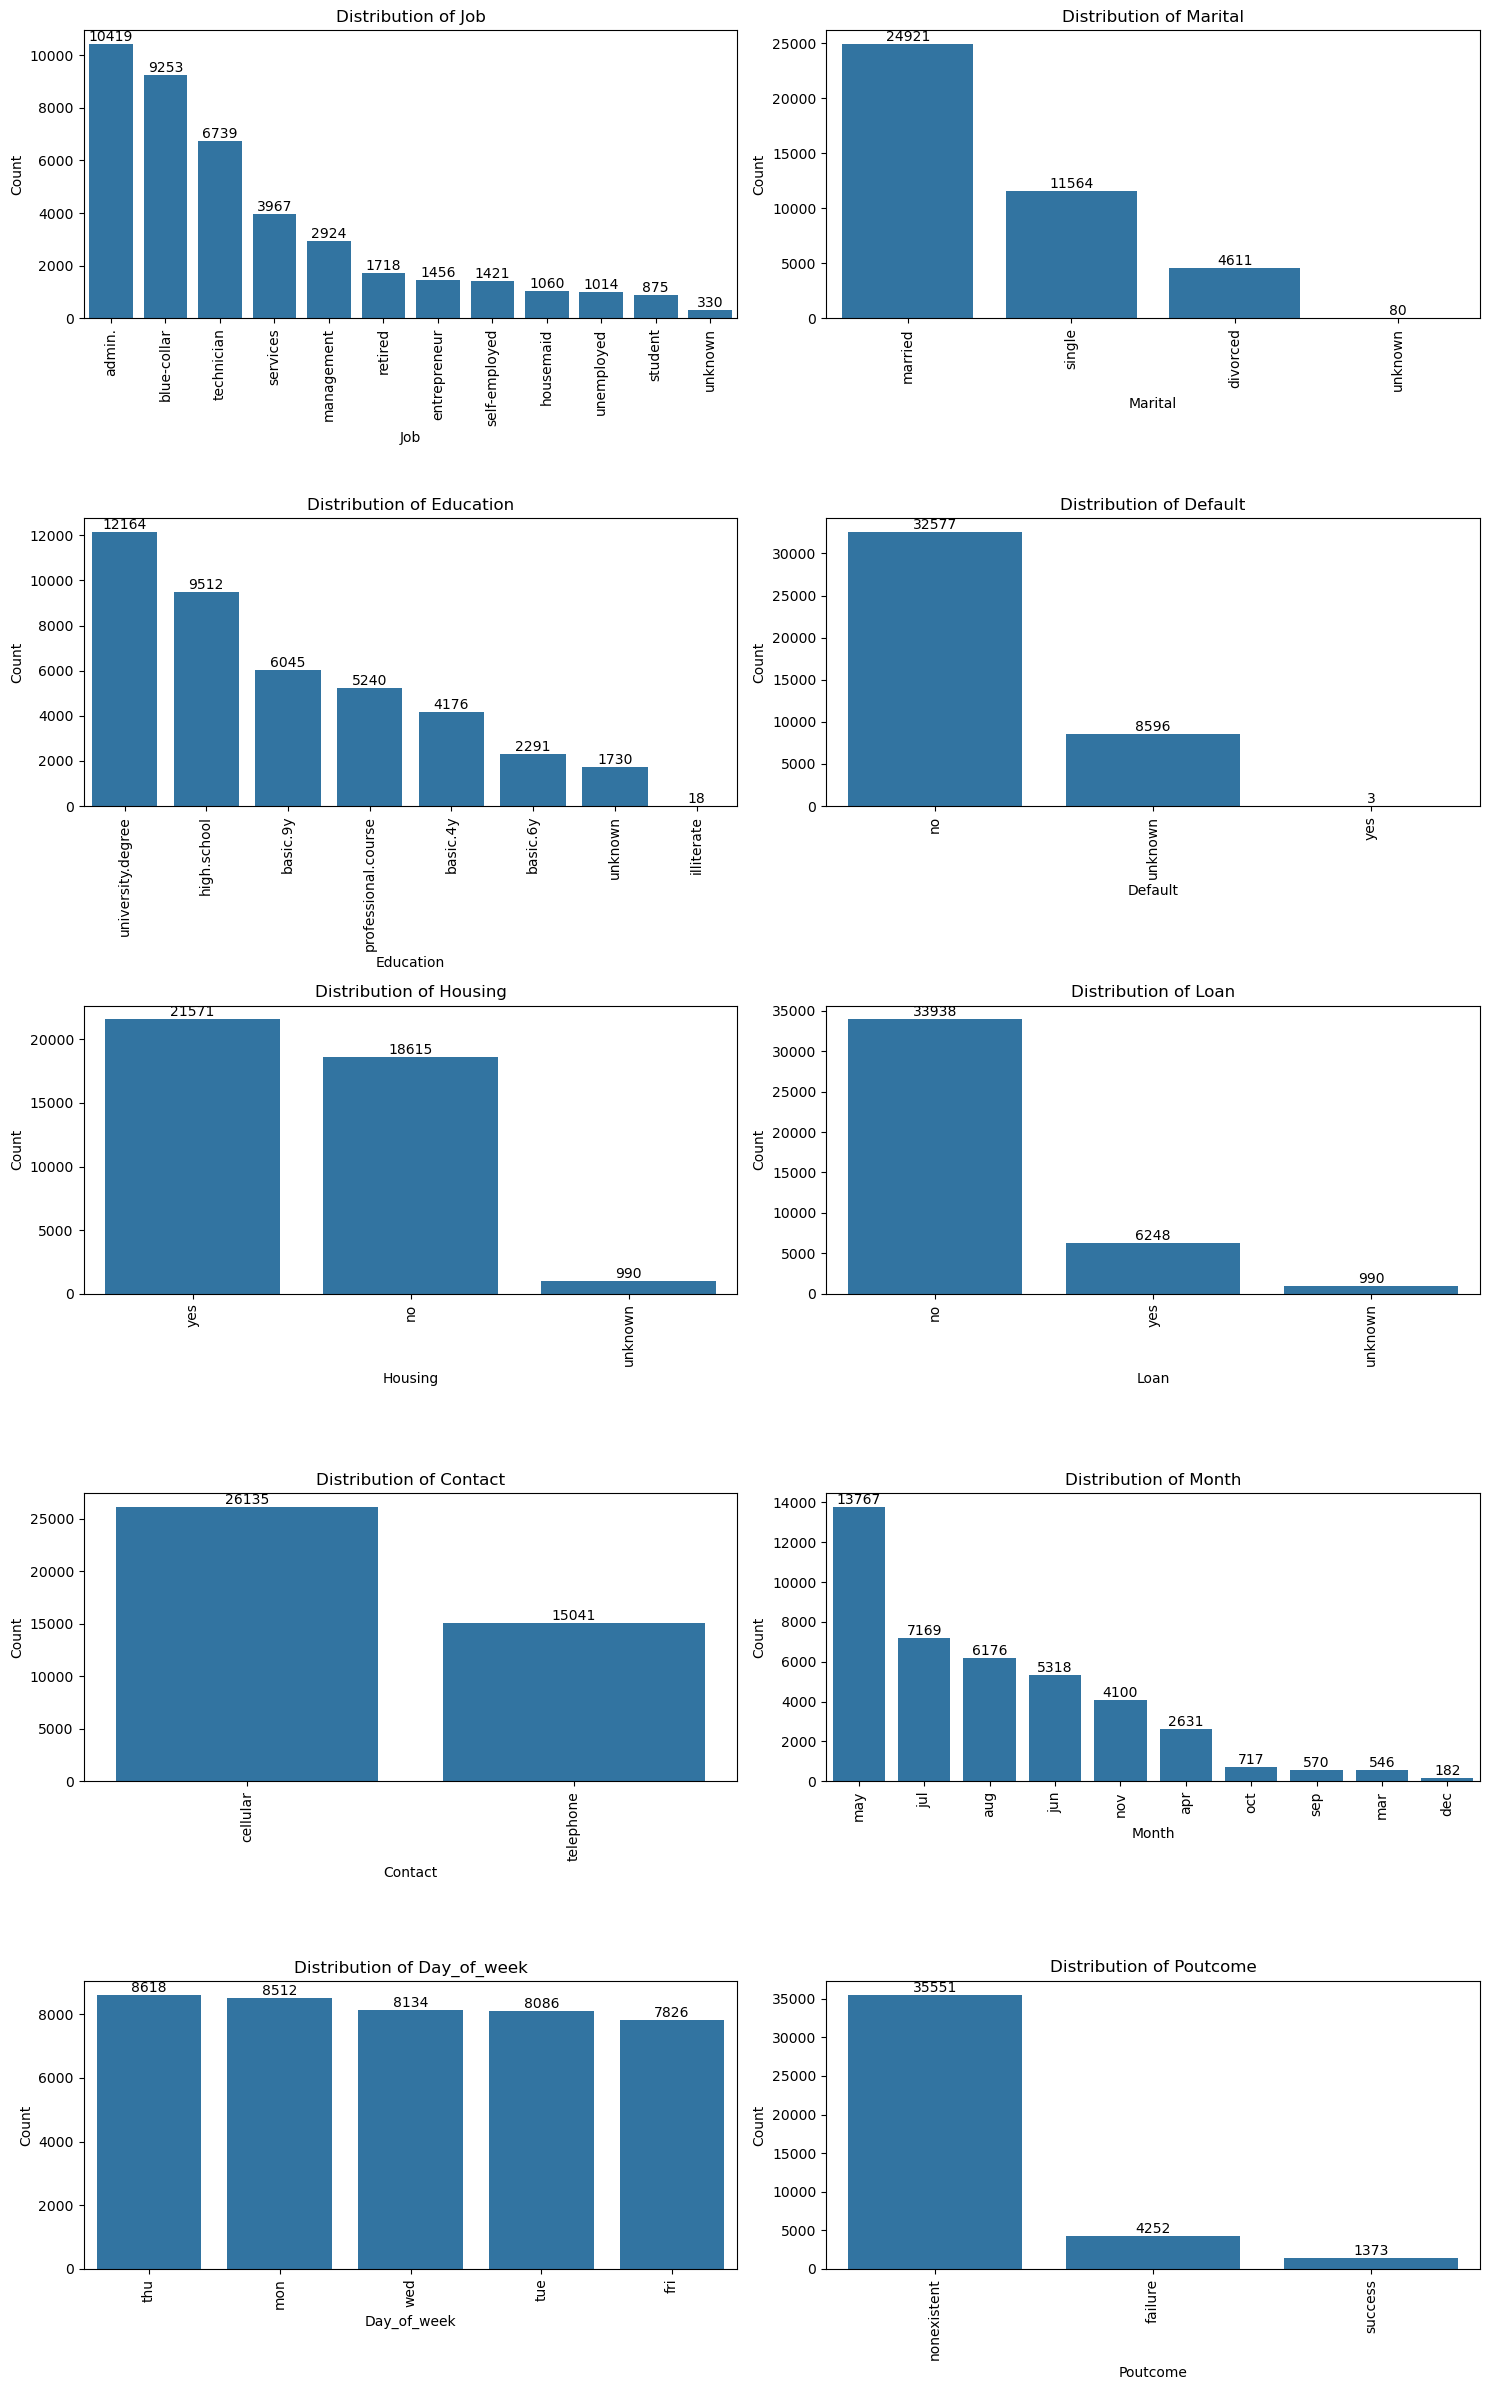

In [18]:
fig, ax = plt.subplots(nrows=5, ncols=2, figsize=(15, 24))

ax = ax.flatten()

for i, col in enumerate(df.drop(columns='y').select_dtypes(include='object').columns):
    sns.countplot(data=df, x=col, order=df[col].value_counts().index, ax=ax[i])
    ax[i].set_title(f'Distribution of {col.capitalize()}')
    ax[i].set_xlabel(f'{col.capitalize()}')
    ax[i].set_ylabel('Count')
    ax[i].tick_params(axis='x', rotation=90)
    for container in ax[i].containers:
        ax[i].bar_label(container)

plt.tight_layout()

Notes:
* The null values are represented as unknown.
* The proportion of unknown in each variable is very small < 3%. 
* 64% of our customers' job are admin, blue-collar, & technician.
...
* Based on the default variable, the proportion of yes is very very small. We have unknown also in this column, if we try to impute this with most frequent or other algorithms, most likely all will end up with no. So we can drop this column.

### 3.2. Target Analysis

#### 3.2.1. Numerical

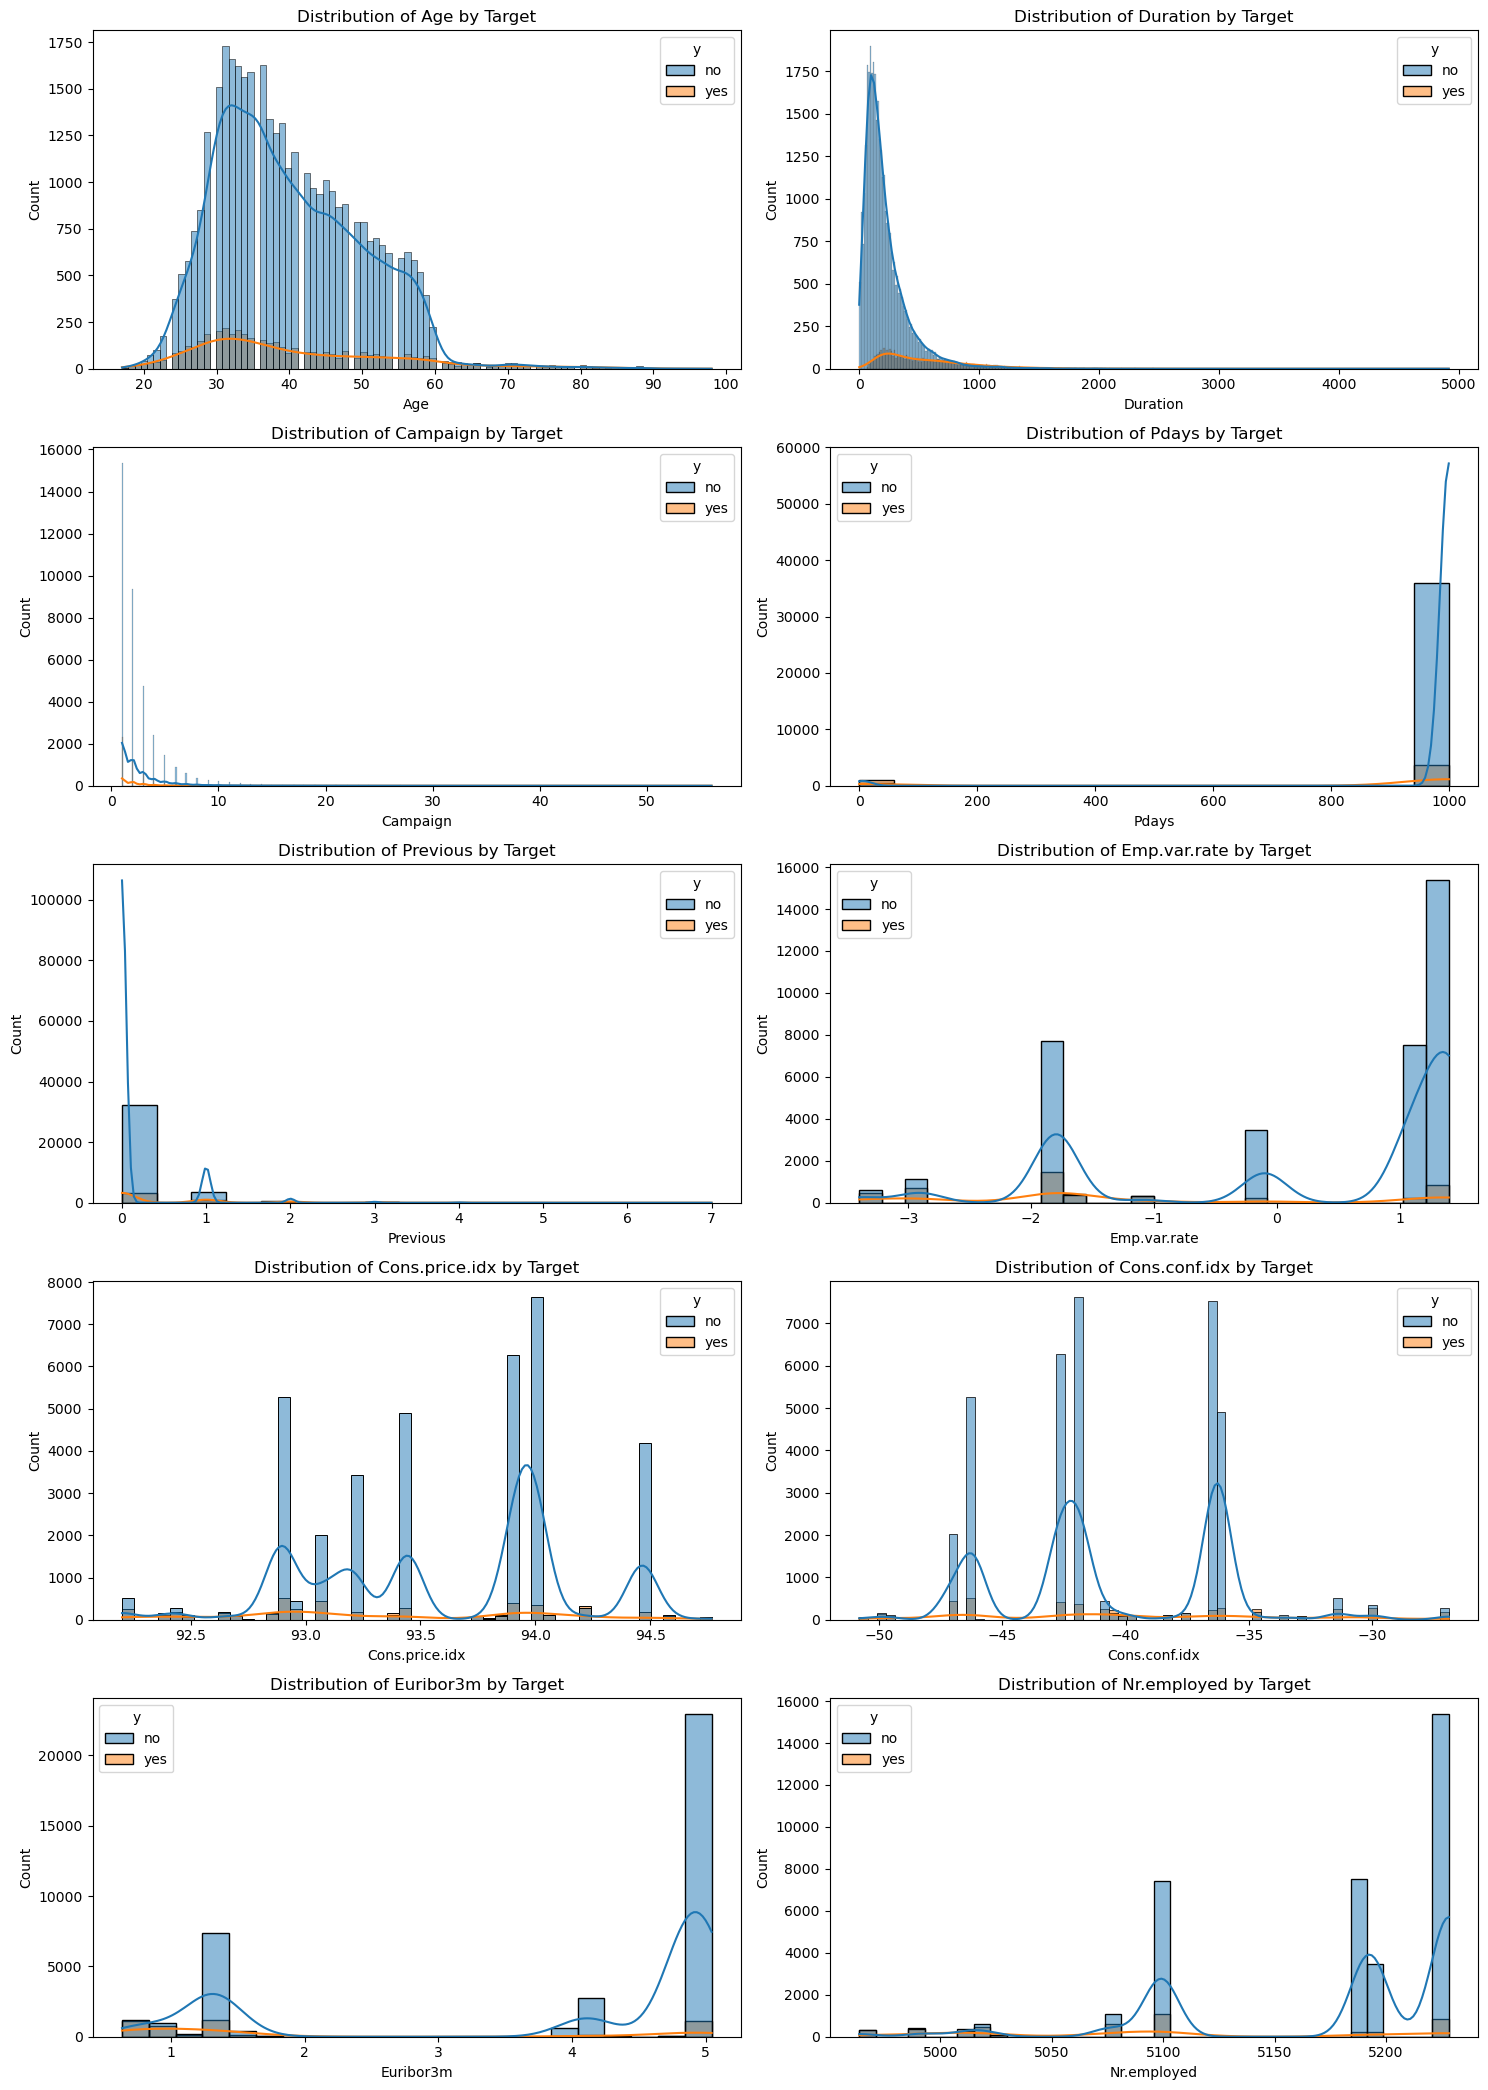

In [ ]:
fig, ax = plt.subplots(nrows=5, ncols=2, figsize=(15, 21))

ax = ax.flatten()

for i, col in enumerate(df[['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 
                            'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y']].columns):
    if col != 'y':
        sns.histplot(data=df, x=col, hue='y', kde=True, ax=ax[i])
        ax[i].set_title(f'Distribution of {col.capitalize()} by Target')
        ax[i].set_xlabel(f'{col.capitalize()}')
        ax[i].set_ylabel('Count')

plt.tight_layout()

Notes:
* Based on age & duration, the higher the value of those variables, the customer most likely will deposit.
* Based on eribor3m & nr.employed, the lower the value of those variables, the customer most likely will deposit.

#### 3.2.2. Categorical

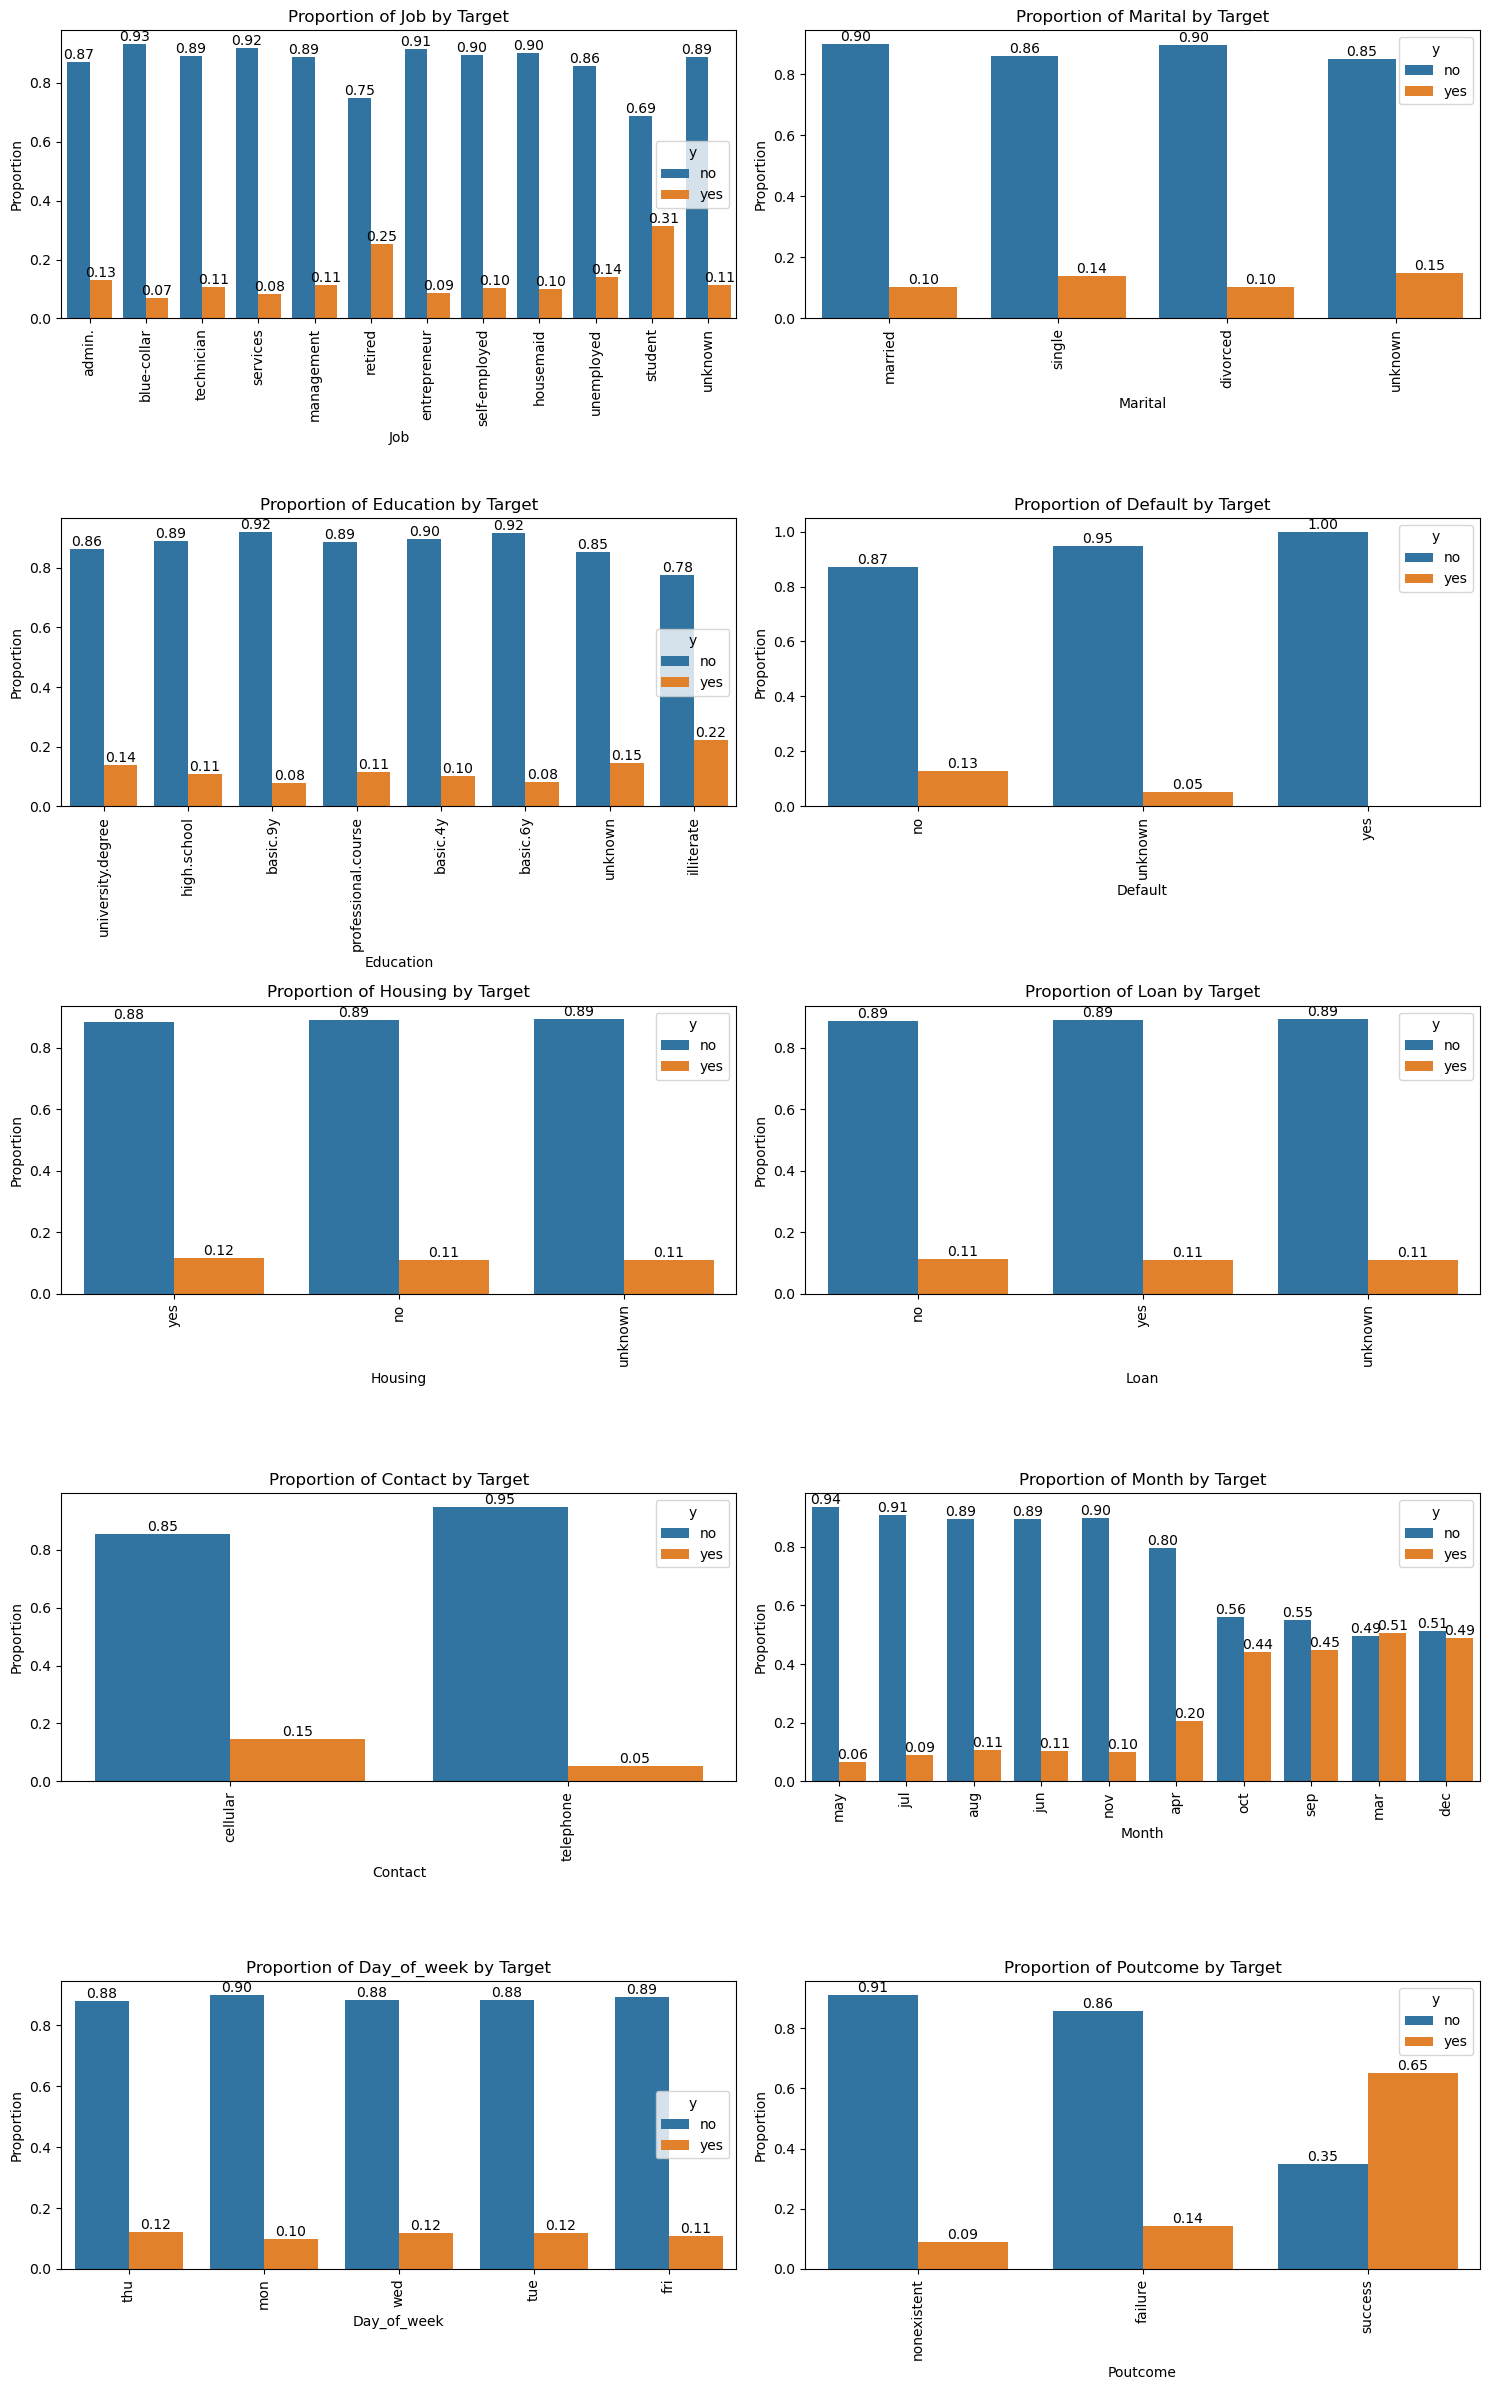

In [40]:
fig, ax = plt.subplots(nrows=5, ncols=2, figsize=(15, 24))

ax = ax.flatten()

for i, col in enumerate(df.select_dtypes(include='object').columns):
    if col != 'y':
        grouped_data = df.groupby([col, 'y']).size().reset_index(name='count')
        total_counts = df[col].value_counts()
        grouped_data['proportion'] = grouped_data.apply(lambda row: row['count'] / total_counts[row[col]], axis=1)

        sns.barplot(data=grouped_data, x=col, y='proportion', hue='y', order=total_counts.index, ax=ax[i])
        
        ax[i].set_title(f'Proportion of {col.capitalize()} by Target')
        ax[i].set_xlabel(f'{col.capitalize()}')
        ax[i].set_ylabel('Proportion')
        ax[i].tick_params(axis='x', rotation=90)
        
        for container in ax[i].containers:
            ax[i].bar_label(container, fmt="%.2f")

plt.tight_layout()

Notes:
* Based on job, student have the highest proportion of will deposit (31%) followed by retired (25%), but the proportion of student is the second lowest right now.
...
* Job & education are high cardinality variables, we can combine several values into 1 in each variables.
* Retired & unemployed have quite same meaning, we can define retired as unemployed but for "older" people. Retired & unemployed have different proportion of will deposit or not. We need to check first before combine into 1 such as is retired mostly come from young people & this different with unemployed? if unemployed for older people have high proportion of deposit like retired then we can combine. Model can understand also since retired will most likely correlated with older people.
* Basic education have same value of proportion, we can combine this.
* For month actually we thought we can combine into quarterly but it turns out for example in q4, only nov, a month with lower proportion compare to other 2 months, so it's better to keep it as it is so model can understand.

In [50]:
df[(df['job']=='retired') & (df['age'] < 60)]['y'].value_counts()

y
no     834
yes    100
Name: count, dtype: int64

In [49]:
df[(df['job']=='unemployed') & (df['age'] >= 60)]['y'].value_counts()

y
no     7
yes    3
Name: count, dtype: int64

### 3.3. Deep Dive

## 4. Data Preprocessing

### Data Splitting

In [9]:
X = df.drop(columns=['duration', 'y', 'default'])
y = df['y']
y = y.replace(['no', 'yes'], [0, 1])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

C:\Users\Davis Sebastian\AppData\Local\Temp\ipykernel_11416\3939729079.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y = y.replace(['no', 'yes'], [0, 1])


### Missing Values

In [10]:
for col in X_train.select_dtypes(include='object').columns:
    if 'unknown' in X_train[col].unique():
        X_train[col] = X_train[col].replace('unknown', np.nan)

for col in X_test.select_dtypes(include='object').columns:
    if 'unknown' in X_test[col].unique():
        X_test[col] = X_test[col].replace('unknown', np.nan)

In [11]:
# https://stackoverflow.com/questions/64900801/implementing-knn-imputation-on-categorical-variables-in-an-sklearn-pipeline?rq=1
from sklearn.impute import SimpleImputer

imputer = ColumnTransformer(
    transformers=[
        ('simple', SimpleImputer(strategy='most_frequent'), X_train.select_dtypes(include=['object']).columns)
    ], remainder='passthrough', verbose_feature_names_out=False
).set_output(transform='pandas')

In [12]:
# Fit and transform X_train
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

### PDAYS

In [67]:
def bin_pdays(x):
    # Convert the output to pandas DataFrame before returning
    return pd.DataFrame(np.where(x < 30, 1, 0), columns=['bin_pdays'], index=x.index)


pdays_feat_engineering = ColumnTransformer(
    transformers=[
        ('bin_pdays', FunctionTransformer(bin_pdays), ['pdays'])
    ], remainder='passthrough', verbose_feature_names_out=False
).set_output(transform='pandas')

In [ ]:
# After fitting and transforming
X_train_pdays = pdays_feat_engineering.fit_transform(X_train_imputed)
X_test_pdays = pdays_feat_engineering.transform(X_test_imputed)

# Assign meaningful column names
#X_train_pdays.columns = ['bin_pdays'] + [col for col in X_train_imputed.columns if col != 'pdays']
#X_test_pdays.columns = ['bin_pdays'] + [col for col in X_test_imputed.columns if col != 'pdays']

c:\anaconda3\Lib\site-packages\sklearn\preprocessing\_function_transformer.py:303: UserWarning: When `set_output` is configured to be 'pandas', `func` should return a pandas DataFrame to follow the `set_output` API  or `feature_names_out` should be defined.
  warnings.warn(warn_msg.format("pandas"))
c:\anaconda3\Lib\site-packages\sklearn\preprocessing\_function_transformer.py:303: UserWarning: When `set_output` is configured to be 'pandas', `func` should return a pandas DataFrame to follow the `set_output` API  or `feature_names_out` should be defined.
  warnings.warn(warn_msg.format("pandas"))


### Outliers

In [36]:
from sklearn.preprocessing import PowerTransformer

transformer = ColumnTransformer(
    transformers=[
        ('power', PowerTransformer(), ['age', 'campaign', 'previous'])
    ], remainder='passthrough', verbose_feature_names_out=False
).set_output(transform='pandas')

In [37]:
X_train_transformed = transformer.fit_transform(X_train_pdays)
X_test_transformed = transformer.transform(X_test_pdays)

In [15]:
X_train_transformed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32940 entries, 36454 to 24790
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             32940 non-null  float64
 1   campaign        32940 non-null  float64
 2   pdays           32940 non-null  float64
 3   previous        32940 non-null  float64
 4   job             32940 non-null  object 
 5   marital         32940 non-null  object 
 6   education       32940 non-null  object 
 7   housing         32940 non-null  object 
 8   loan            32940 non-null  object 
 9   contact         32940 non-null  object 
 10  month           32940 non-null  object 
 11  day_of_week     32940 non-null  object 
 12  poutcome        32940 non-null  object 
 13  emp.var.rate    32940 non-null  float64
 14  cons.price.idx  32940 non-null  float64
 15  cons.conf.idx   32940 non-null  float64
 16  euribor3m       32940 non-null  float64
 17  nr.employed     32940 non-null  

In [38]:
X_test_transformed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8236 entries, 8490 to 12395
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             8236 non-null   float64
 1   campaign        8236 non-null   float64
 2   previous        8236 non-null   float64
 3   bin_pdays       8236 non-null   object 
 4   job             8236 non-null   object 
 5   marital         8236 non-null   object 
 6   education       8236 non-null   object 
 7   housing         8236 non-null   object 
 8   loan            8236 non-null   object 
 9   contact         8236 non-null   object 
 10  month           8236 non-null   object 
 11  day_of_week     8236 non-null   object 
 12  poutcome        8236 non-null   object 
 13  emp.var.rate    8236 non-null   object 
 14  cons.price.idx  8236 non-null   object 
 15  cons.conf.idx   8236 non-null   object 
 16  euribor3m       8236 non-null   object 
 17  nr.employed     8236 non-null   ob

### Encoding

In [39]:
encoder = ColumnTransformer(
    transformers=[
        ('ordinal', OrdinalEncoder(categories=[
            ['illiterate', 'basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'professional.course', 'university.degree']
        ]), ['education']),
        ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False), ['job', 'marital', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome'])
    ], remainder='passthrough', verbose_feature_names_out=False
).set_output(transform='pandas')

In [40]:
X_train_encoded = encoder.fit_transform(X_train_transformed)
X_test_encoded = encoder.transform(X_test_transformed)


### Scaling

In [41]:
scaler = ColumnTransformer(
    transformers=[
        ('standard', StandardScaler(), X_train_encoded.columns)
    ], remainder='passthrough', verbose_feature_names_out=False
).set_output(transform='pandas')

In [42]:
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_test_scaled = scaler.transform(X_test_encoded)

### VIF

In [44]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = [variance_inflation_factor(X_train_scaled.values, i) for i in range(len(X_train_scaled.columns))]

vif = pd.DataFrame({
    "Variable": X_train_scaled.columns,
    "VIF": vif_data
})

In [46]:
df_dict = {
    'job': 10,
    'marital': 2,
    'education': 6,
    'default': 1,
    'housing': 1,
    'loan': 1,
    'contact': 1,
    'month': 9,
    'day_of_week': 4,
    'poutcome': 2,
}

# Create a function to match the encoded column names back to the original categorical feature
def get_df_for_column(column_name, df_dict):
    # Find the categorical feature name based on the column prefix
    for feature in df_dict:
        if feature in column_name:
            return df_dict[feature]
    return 1  # Default to 1 if no match is found (for continuous variables)

# Calculate GVIF: GVIF = VIF^(1/2 * df)
vif['GVIF'] = vif['VIF'] ** (1 / (2 * vif['Variable'].map(lambda x: get_df_for_column(x, df_dict))))

vif.sort_values(by='GVIF', ascending=False)

,Variable,VIF,GVIF
33,previous,2.515751e+06,1586.111808
29,poutcome_nonexistent,2.514912e+06,39.822701
35,emp.var.rate,2.396206e+02,15.479683
39,nr.employed,2.020847e+02,14.215648
38,euribor3m,1.995832e+02,14.127392
36,cons.price.idx,8.991976e+01,9.482603
34,bin_pdays,1.244308e+01,3.527475
37,cons.conf.idx,6.779493e+00,2.603746
15,contact_telephone,3.579075e+00,1.891844
30,poutcome_success,1.114157e+01,1.826992


In [52]:
vif_data = [variance_inflation_factor(X_train_scaled.drop(columns=['previous', 'emp.var.rate', 'nr.employed']).values, i) for i in range(len(X_train_scaled.drop(columns=['previous', 'emp.var.rate', 'nr.employed']).columns))]

vif = pd.DataFrame({
    "Variable": X_train_scaled.drop(columns=['previous', 'emp.var.rate', 'nr.employed']).columns,
    "VIF": vif_data
})

vif['GVIF'] = vif['VIF'] ** (1 / (2 * vif['Variable'].map(lambda x: get_df_for_column(x, df_dict))))

vif.sort_values(by='GVIF', ascending=False)

,Variable,VIF,GVIF
33,bin_pdays,10.961921,3.310879
36,euribor3m,4.855562,2.203534
34,cons.price.idx,4.258369,2.063582
15,contact_telephone,3.266180,1.807258
30,poutcome_success,10.373042,1.794637
35,cons.conf.idx,2.309365,1.519660
12,marital_single,2.920747,1.307295
11,marital_married,2.567933,1.265890
31,age,1.555443,1.247174
29,poutcome_nonexistent,1.627291,1.129448


In [53]:
selector = ColumnTransformer(
    transformers=[
        ('vif', 'drop', ['previous', 'emp.var.rate', 'nr.employed'])
    ], remainder='passthrough', verbose_feature_names_out=False
).set_output(transform='pandas')

In [54]:
X_train_selected = selector.fit_transform(X_train_scaled)
X_test_selected = selector.transform(X_test_scaled)

## Modeling

In [68]:
from sklearn.metrics import precision_score, average_precision_score, make_scorer, classification_report
from sklearn.model_selection import cross_validate, StratifiedKFold
from imblearn.pipeline import Pipeline as ImbPipeline

def models_evaluation(models, preprocessors, X_train, X_test, y_train, y_test):
    for model in models:
        
        pipe = ImbPipeline([
            ('imputer', preprocessors[0]),
            ('pdays', preprocessors[1]),
            ('transformer', preprocessors[2]),
            ('encoder', preprocessors[3]),
            ('scaler', preprocessors[4]),
            ('selector', preprocessors[5]),
            ('resampler', preprocessors[6]),
            ('model', model)
        ])

        precision_scorer = make_scorer(precision_score, average='binary')
        auprc_scorer = make_scorer(average_precision_score)

        cv_results = cross_validate(
            estimator=pipe,
            X=X_train,
            y=y_train,
            scoring={'precision': precision_scorer, 'auprc': auprc_scorer},
            cv=StratifiedKFold(n_splits=10, shuffle=True, random_state=42),
            return_train_score=True
        )

        model_name = model.__class__.__name__
        
        train_precision_mean = cv_results['train_precision'].mean()
        train_precision_std = cv_results['train_precision'].std()
        train_auprc_mean = cv_results['train_auprc'].mean()
        train_auprc_std = cv_results['train_auprc'].std()

        test_precision_mean = cv_results['test_precision'].mean()
        test_precision_std = cv_results['test_precision'].std()
        test_auprc_mean = cv_results['test_auprc'].mean()
        test_auprc_std = cv_results['test_auprc'].std()

        print(f"\n{'='*60}")
        print(f"{'Model: ' + model_name:^58}")
        print(f"{'='*60}")
        print(f"\n{'Train Precision:':<20} {train_precision_mean:.4f} ± {train_precision_std:.4f}")
        print(f"{'Train AUPRC:':<20} {train_auprc_mean:.4f} ± {train_auprc_std:.4f}")
        print(f"{'Test Precision:':<20} {test_precision_mean:.4f} ± {test_precision_std:.4f}")
        print(f"{'Test AUPRC:':<20} {test_auprc_mean:.4f} ± {test_auprc_std:.4f}")
        print(f"\n{'='*60}\n")

        pipe.fit(X_train, y_train)

        y_pred_train = pipe.predict(X_train)
        y_pred_test = pipe.predict(X_test)

        print(f"\n{'='*60}")
        print(f"{'Train Classification Report':^58}")
        print(f"{'='*60}")
        print(f"\n{classification_report(y_train, y_pred_train)}")

        print(f"\n{'='*60}")
        print(f"{'Test Classification Report':^58}")
        print(f"{'='*60}")
        print(f"\n{classification_report(y_test, y_pred_test)}")
        
        print(f"\n{'='*60}\n")

In [69]:
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

models = [
    GradientBoostingClassifier(random_state=42, verbose=0),
    XGBClassifier(random_state=42),
    LGBMClassifier(random_state=42, verbose=0)
]

preprocessors = [imputer, pdays_feat_engineering, transformer, encoder, scaler, selector, None]

models_evaluation(models, preprocessors, X_train, X_test, y_train, y_test)


            Model: GradientBoostingClassifier             

Train Precision:     0.7180 ± 0.0053
Train AUPRC:         0.2741 ± 0.0029
Test Precision:      0.6679 ± 0.0478
Test AUPRC:          0.2498 ± 0.0206



               Train Classification Report                

              precision    recall  f1-score   support

           0       0.91      0.99      0.95     29229
           1       0.72      0.26      0.38      3711

    accuracy                           0.91     32940
   macro avg       0.81      0.62      0.67     32940
weighted avg       0.89      0.91      0.88     32940


                Test Classification Report                

              precision    recall  f1-score   support

           0       0.91      0.98      0.94      7308
           1       0.64      0.22      0.33       928

    accuracy                           0.90      8236
   macro avg       0.77      0.60      0.64      8236
weighted avg       0.88      0.90      0.88      8236




          

In [72]:
models = [
    GradientBoostingClassifier(max_depth=6, random_state=42, verbose=0),
    XGBClassifier(max_depth=5, random_state=42),
    LGBMClassifier(max_depth=5, random_state=42, verbose=0)
]

from imblearn.over_sampling import ADASYN

preprocessors = [imputer, pdays_feat_engineering, transformer, encoder, scaler, selector, ADASYN()]

models_evaluation(models, preprocessors, X_train, X_test, y_train, y_test)


            Model: GradientBoostingClassifier             

Train Precision:     0.6750 ± 0.0076
Train AUPRC:         0.3467 ± 0.0027
Test Precision:      0.5498 ± 0.0349
Test AUPRC:          0.2622 ± 0.0205



               Train Classification Report                

              precision    recall  f1-score   support

           0       0.93      0.97      0.95     29229
           1       0.67      0.41      0.51      3711

    accuracy                           0.91     32940
   macro avg       0.80      0.69      0.73     32940
weighted avg       0.90      0.91      0.90     32940


                Test Classification Report                

              precision    recall  f1-score   support

           0       0.92      0.97      0.94      7308
           1       0.56      0.35      0.43       928

    accuracy                           0.90      8236
   macro avg       0.74      0.66      0.69      8236
weighted avg       0.88      0.90      0.88      8236




          

In [ ]:
models = [
    GradientBoostingClassifier(random_state=42, verbose=0),
    XGBClassifier(max_depth=4, random_state=42),
    LGBMClassifier(max_depth=6, random_state=42, verbose=0)
]
from imblearn.over_sampling import ADASYN
preprocessors = [imputer, pdays_feat_engineering, transformer, encoder, scaler, selector, ADASYN()]

models_evaluation(models, preprocessors, X_train, X_test, y_train, y_test)


            Model: GradientBoostingClassifier             

Train Precision:     0.4600 ± 0.0040
Train AUPRC:         0.2565 ± 0.0034
Test Precision:      0.4507 ± 0.0289
Test AUPRC:          0.2497 ± 0.0185



               Train Classification Report                

              precision    recall  f1-score   support

           0       0.93      0.94      0.93     29238
           1       0.46      0.41      0.43      3712

    accuracy                           0.88     32950
   macro avg       0.69      0.67      0.68     32950
weighted avg       0.87      0.88      0.88     32950


                Test Classification Report                

              precision    recall  f1-score   support

           0       0.93      0.94      0.94      7310
           1       0.48      0.44      0.46       928

    accuracy                           0.88      8238
   macro avg       0.71      0.69      0.70      8238
weighted avg       0.88      0.88      0.88      8238




          

In [ ]:
models = [
    GradientBoostingClassifier(random_state=42, verbose=0),
    XGBClassifier(max_depth=4, random_state=42),
    LGBMClassifier(max_depth=6, random_state=42, verbose=0)
]
from imblearn.over_sampling import RandomOverSampler
preprocessors = [imputer, pdays_feat_engineering, transformer, encoder, scaler, selector, RandomOverSampler()]

models_evaluation(models, preprocessors, X_train, X_test, y_train, y_test)


            Model: GradientBoostingClassifier             

Train Precision:     0.3450 ± 0.0045
Train AUPRC:         0.2580 ± 0.0021
Test Precision:      0.3386 ± 0.0148
Test AUPRC:          0.2522 ± 0.0149



               Train Classification Report                

              precision    recall  f1-score   support

           0       0.95      0.85      0.90     29238
           1       0.35      0.63      0.45      3712

    accuracy                           0.82     32950
   macro avg       0.65      0.74      0.67     32950
weighted avg       0.88      0.82      0.85     32950


                Test Classification Report                

              precision    recall  f1-score   support

           0       0.95      0.85      0.90      7310
           1       0.35      0.65      0.46       928

    accuracy                           0.83      8238
   macro avg       0.65      0.75      0.68      8238
weighted avg       0.88      0.83      0.85      8238




          

randomoversampler bikin bagus recall, adasyn untuk precision

In [29]:
from lightgbm import LGBMClassifier

ada = ADASYN(random_state=42)
X_train_resampled, y_train_resampled = ada.fit_resample(X_train_selected, y_train)

lgbmc = LGBMClassifier(random_state=42, max_depth=6).fit(X_train_resampled, y_train_resampled)
y_pred = lgbmc.predict(X_test_selected)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94      7308
           1       0.57      0.32      0.41       928

    accuracy                           0.90      8236
   macro avg       0.74      0.64      0.68      8236
weighted avg       0.88      0.90      0.88      8236



In [33]:
y_pred_train = lgbmc.predict(X_train_selected)
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95     29229
           1       0.62      0.35      0.45      3711

    accuracy                           0.90     32940
   macro avg       0.77      0.66      0.70     32940
weighted avg       0.89      0.90      0.89     32940



Text(50.722222222222214, 0.5, 'Actual Label')

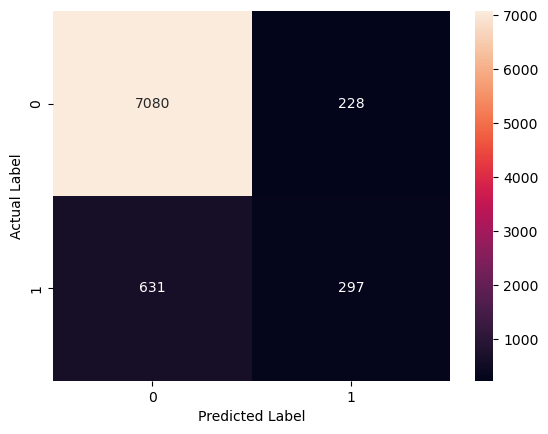

In [35]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')

In [37]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(random_state=42).fit(X_train_selected, y_train)

y_pred = gbc.predict(X_test_selected)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95      7308
           1       0.66      0.20      0.31       928

    accuracy                           0.90      8236
   macro avg       0.78      0.59      0.63      8236
weighted avg       0.88      0.90      0.87      8236



Text(50.722222222222214, 0.5, 'Actual Label')

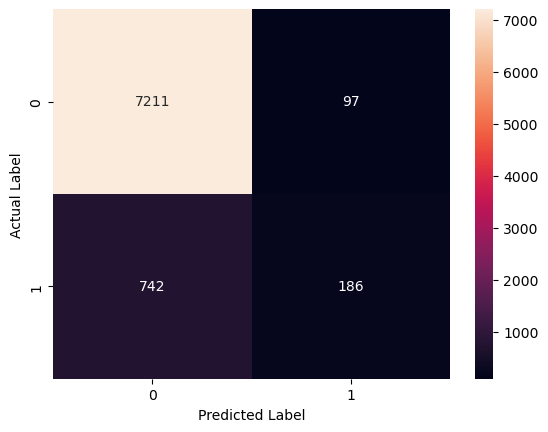

In [38]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')

In [32]:
import optuna
from lightgbm import LGBMClassifier
from sklearn.metrics import fbeta_score

def objective(trial):
    params = {
        'objective': 'binary',
        'metric': 'f0.5',
        'boosting_type': trial.suggest_categorical('boosting_type', ['gbdt', 'dart', 'rf']),
        'learning_rate': trial.suggest_float('learning_rate', 0.001, 0.08, log=True),
        'n_estimators': trial.suggest_int('n_estimators', 100, 500, step=50),
        'num_leaves': trial.suggest_int('num_leaves', 20, 100),
        'min_child_samples': trial.suggest_int('min_child_samples', 10, 100),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 1e-8, 10.0, log=True),
        'reg_lambda': trial.suggest_float('reg_lambda', 1e-8, 10.0, log=True)
    }

    # Train LGBM model
    model = LGBMClassifier(**params, n_jobs=-1, random_state=42)
    model.fit(
        X_train_selected, y_train,
        eval_set=[(X_test_selected, y_test)]
    )

    # Make predictions
    preds = model.predict(X_test_selected)

    # Compute F0.5 score
    f05 = fbeta_score(y_test, preds, beta=0.5)

    return f05  # Maximize F0.5 score

# Run optimization with n_trials=100
study = optuna.create_study(direction='maximize', sampler=optuna.samplers.TPESampler(seed=42))  # Ensure reproducibility
study.optimize(objective, n_trials=100)

# Print best parameters
print(f'Best parameters: {study.best_params}')

[I 2025-02-18 17:57:26,403] A new study created in memory with name: no-name-878e6962-856f-476f-bd85-f3eb0e4b4769
[I 2025-02-18 17:57:30,648] Trial 0 finished with value: 0.4280821917808219 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.013781642084590049, 'n_estimators': 150, 'num_leaves': 32, 'min_child_samples': 15, 'subsample': 0.9330880728874675, 'colsample_bytree': 0.8005575058716043, 'reg_alpha': 0.023585940584142682, 'reg_lambda': 1.5320059381854043e-08}. Best is trial 0 with value: 0.4280821917808219.
[I 2025-02-18 17:57:31,990] Trial 1 finished with value: 0.0 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.0022183459467487615, 'n_estimators': 150, 'num_leaves': 44, 'min_child_samples': 57, 'subsample': 0.7159725093210578, 'colsample_bytree': 0.645614570099021, 'reg_alpha': 0.0032112643094417484, 'reg_lambda': 1.8007140198129195e-07}. Best is trial 0 with value: 0.4280821917808219.
[I 2025-02-18 17:57:33,445] Trial 2 finished with value: 0.468901846

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-02-18 17:57:36,536] Trial 3 finished with value: 0.0 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.003799333474142, 'n_estimators': 100, 'num_leaves': 75, 'min_child_samples': 50, 'subsample': 0.5610191174223894, 'colsample_bytree': 0.7475884550556351, 'reg_alpha': 2.039373116525212e-08, 'reg_lambda': 1.527156759251193}. Best is trial 2 with value: 0.46890184645286687.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-02-18 17:57:48,365] Trial 4 finished with value: 0.4315144766146993 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.009766439040435945, 'n_estimators': 300, 'num_leaves': 34, 'min_child_samples': 98, 'subsample': 0.8875664116805573, 'colsample_bytree': 0.9697494707820946, 'reg_alpha': 1.1309571585271483, 'reg_lambda': 0.002404915432737351}. Best is trial 2 with value: 0.46890184645286687.
[I 2025-02-18 17:57:49,853] Trial 5 finished with value: 0.0 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.001219190586190593, 'n_estimators': 200, 'num_leaves': 51, 'min_child_samples': 34, 'subsample': 0.9143687545759647, 'colsample_bytree': 0.6783766633467947, 'reg_alpha': 3.376063348877853e-06, 'reg_lambda': 0.0007660634613082914}. Best is trial 2 with value: 0.46890184645286687.
[I 2025-02-18 17:58:09,303] Trial 6 finished with value: 0.47178130511463845 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.07553263704530351, 'n_estimators': 400, 'num_le

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-02-18 17:59:04,604] Trial 19 finished with value: 0.47863485016648166 and parameters: {'boosting_type': 'rf', 'learning_rate': 0.007893393991346982, 'n_estimators': 300, 'num_leaves': 74, 'min_child_samples': 44, 'subsample': 0.6072731361598955, 'colsample_bytree': 0.8618421863112119, 'reg_alpha': 8.568194822353934, 'reg_lambda': 0.03565092703220823}. Best is trial 9 with value: 0.4919201520912547.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-02-18 17:59:06,854] Trial 20 finished with value: 0.0 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.0018017236089955277, 'n_estimators': 250, 'num_leaves': 90, 'min_child_samples': 23, 'subsample': 0.7643794327804937, 'colsample_bytree': 0.8490483200027008, 'reg_alpha': 0.0007628495263552147, 'reg_lambda': 8.802075014264782}. Best is trial 9 with value: 0.4919201520912547.
[I 2025-02-18 17:59:10,039] Trial 21 finished with value: 0.4848628192999054 and parameters: {'boosting_type': 'rf', 'learning_rate': 0.005772786990000675, 'n_estimators': 350, 'num_leaves': 99, 'min_child_samples': 42, 'subsample': 0.8475270975331819, 'colsample_bytree': 0.9534643162712126, 'reg_alpha': 7.72396478586418e-06, 'reg_lambda': 3.4579407538926626e-05}. Best is trial 9 with value: 0.4919201520912547.
[I 2025-02-18 17:59:11,823] Trial 22 finished with value: 0.4849537037037037 and parameters: {'boosting_type': 'rf', 'learning_rate': 0.0035921269758978453, 'n_estimators': 200, 'num_lea

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2025-02-18 18:00:20,024] Trial 43 finished with value: 0.49036281179138325 and parameters: {'boosting_type': 'rf', 'learning_rate': 0.0020265814995179036, 'n_estimators': 200, 'num_leaves': 94, 'min_child_samples': 13, 'subsample': 0.9763869569120932, 'colsample_bytree': 0.5529547927623387, 'reg_alpha': 0.043381284819950114, 'reg_lambda': 2.0161242776386874e-08}. Best is trial 41 with value: 0.4997261774370208.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2025-02-18 18:00:21,236] Trial 44 finished with value: 0.49859550561797755 and parameters: {'boosting_type': 'rf', 'learning_rate': 0.0013630875626656081, 'n_estimators': 100, 'num_leaves': 76, 'min_child_samples': 17, 'subsample': 0.9303134575626468, 'colsample_bytree': 0.6015415115188838, 'reg_alpha': 0.6774747308657318, 'reg_lambda': 7.599920999948703e-08}. Best is trial 41 with value: 0.4997261774370208.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-02-18 18:00:22,436] Trial 45 finished with value: 0.0 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.0013643644840549082, 'n_estimators': 100, 'num_leaves': 76, 'min_child_samples': 22, 'subsample': 0.9383938602337654, 'colsample_bytree': 0.5425073804652126, 'reg_alpha': 1.8963449978489122, 'reg_lambda': 8.515770679074683e-08}. Best is trial 41 with value: 0.4997261774370208.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-02-18 18:00:23,546] Trial 46 finished with value: 0.4922566371681416 and parameters: {'boosting_type': 'rf', 'learning_rate': 0.0010355645539849025, 'n_estimators': 100, 'num_leaves': 83, 'min_child_samples': 13, 'subsample': 0.9147765471390122, 'colsample_bytree': 0.6559563815427419, 'reg_alpha': 2.038089887057209, 'reg_lambda': 5.196778367422798e-07}. Best is trial 41 with value: 0.4997261774370208.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2025-02-18 18:00:25,422] Trial 47 finished with value: 0.4929393305439331 and parameters: {'boosting_type': 'rf', 'learning_rate': 0.0227722428766891, 'n_estimators': 150, 'num_leaves': 89, 'min_child_samples': 27, 'subsample': 0.5246757777004823, 'colsample_bytree': 0.6153217433962045, 'reg_alpha': 0.4204832243589118, 'reg_lambda': 1.3724747924874822e-07}. Best is trial 41 with value: 0.4997261774370208.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2025-02-18 18:00:34,552] Trial 48 finished with value: 0.39294554455445546 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.00988557987871975, 'n_estimators': 200, 'num_leaves': 80, 'min_child_samples': 15, 'subsample': 0.9840553079194496, 'colsample_bytree': 0.7718311656067935, 'reg_alpha': 0.5048639959096317, 'reg_lambda': 2.342394994800581e-08}. Best is trial 41 with value: 0.4997261774370208.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2025-02-18 18:00:35,784] Trial 49 finished with value: 0.48527808069792805 and parameters: {'boosting_type': 'rf', 'learning_rate': 0.002147954007508116, 'n_estimators': 100, 'num_leaves': 59, 'min_child_samples': 81, 'subsample': 0.8662297796412161, 'colsample_bytree': 0.5679960983905981, 'reg_alpha': 0.055407642114920976, 'reg_lambda': 5.3098970956898754e-08}. Best is trial 41 with value: 0.4997261774370208.
[I 2025-02-18 18:00:37,042] Trial 50 finished with value: 0.4870775347912525 and parameters: {'boosting_type': 'rf', 'learning_rate': 0.0010282676630866967, 'n_estimators': 150, 'num_leaves': 46, 'min_child_samples': 31, 'subsample': 0.8999424818095195, 'colsample_bytree': 0.6830665041472999, 'reg_alpha': 0.0012213356537325185, 'reg_lambda': 2.2283791716050762e-07}. Best is trial 41 with value: 0.4997261774370208.
[I 2025-02-18 18:00:38,958] Trial 51 finished with value: 0.49682875264270615 and parameters: {'boosting_type': 'rf', 'learning_rate': 0.00280990247738166, 'n_estima

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-02-18 18:00:53,024] Trial 60 finished with value: 0.4879753914988814 and parameters: {'boosting_type': 'rf', 'learning_rate': 0.002530785260776724, 'n_estimators': 400, 'num_leaves': 91, 'min_child_samples': 13, 'subsample': 0.9829849961544791, 'colsample_bytree': 0.6685729213652785, 'reg_alpha': 6.423484263643577, 'reg_lambda': 0.00862585014791406}. Best is trial 41 with value: 0.4997261774370208.
[I 2025-02-18 18:00:53,738] Trial 61 finished with value: 0.4956663055254605 and parameters: {'boosting_type': 'rf', 'learning_rate': 0.002884208214426542, 'n_estimators': 100, 'num_leaves': 84, 'min_child_samples': 10, 'subsample': 0.9692169494587323, 'colsample_bytree': 0.5991044313357959, 'reg_alpha': 0.0003754963741132567, 'reg_lambda': 0.20900287695078024}. Best is trial 41 with value: 0.4997261774370208.
[I 2025-02-18 18:00:54,509] Trial 62 finished with value: 0.4873110151187905 and parameters: {'boosting_type': 'rf', 'learning_rate': 0.004421288051680089, 'n_estimators': 100,

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-02-18 18:00:59,471] Trial 66 finished with value: 0.48257743362831856 and parameters: {'boosting_type': 'rf', 'learning_rate': 0.0012693081919507103, 'n_estimators': 150, 'num_leaves': 81, 'min_child_samples': 23, 'subsample': 0.9566588494757206, 'colsample_bytree': 0.5811575793768676, 'reg_alpha': 0.6255463337502452, 'reg_lambda': 2.8203428622791326e-08}. Best is trial 41 with value: 0.4997261774370208.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2025-02-18 18:01:00,404] Trial 67 finished with value: 0.48875432525951557 and parameters: {'boosting_type': 'rf', 'learning_rate': 0.002534172291940888, 'n_estimators': 100, 'num_leaves': 100, 'min_child_samples': 17, 'subsample': 0.8979914259388674, 'colsample_bytree': 0.5292133590852799, 'reg_alpha': 0.22283873937039514, 'reg_lambda': 1.0016300986899892e-06}. Best is trial 41 with value: 0.4997261774370208.
[I 2025-02-18 18:01:15,914] Trial 68 finished with value: 0.41478555304740405 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.010339669596416867, 'n_estimators': 400, 'num_leaves': 77, 'min_child_samples': 12, 'subsample': 0.9678620874552165, 'colsample_bytree': 0.5562551018063385, 'reg_alpha': 0.00023618569031132322, 'reg_lambda': 1.005034131019754e-08}. Best is trial 41 with value: 0.4997261774370208.
[I 2025-02-18 18:01:16,796] Trial 69 finished with value: 0.4805491990846682 and parameters: {'boosting_type': 'rf', 'learning_rate': 0.007501751426016539, 'n_esti

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2025-02-18 18:01:31,246] Trial 88 finished with value: 0.48130193905817176 and parameters: {'boosting_type': 'rf', 'learning_rate': 0.00820261708386509, 'n_estimators': 100, 'num_leaves': 93, 'min_child_samples': 25, 'subsample': 0.9513727995851184, 'colsample_bytree': 0.8828728535484229, 'reg_alpha': 0.00012051309621368383, 'reg_lambda': 3.018994727371241}. Best is trial 77 with value: 0.5056874381800198.
[I 2025-02-18 18:01:31,965] Trial 89 finished with value: 0.5057442557442557 and parameters: {'boosting_type': 'rf', 'learning_rate': 0.0022173957532794137, 'n_estimators': 100, 'num_leaves': 95, 'min_child_samples': 12, 'subsample': 0.9865858824103017, 'colsample_bytree': 0.8355320601986176, 'reg_alpha': 2.447401779817169e-06, 'reg_lambda': 0.09157506618936256}. Best is trial 89 with value: 0.5057442557442557.
[I 2025-02-18 18:01:33,024] Trial 90 finished with value: 0.0 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.002278859677044772, 'n_estimators': 150, 'num_lea

Best parameters: {'boosting_type': 'rf', 'learning_rate': 0.03926374634687673, 'n_estimators': 150, 'num_leaves': 94, 'min_child_samples': 14, 'subsample': 0.6696728893891587, 'colsample_bytree': 0.8338120405234158, 'reg_alpha': 4.849751706662257e-07, 'reg_lambda': 0.13627652916210953}


In [34]:
lgbmc = LGBMClassifier(
    boosting_type='rf',
    learning_rate=0.03926374634687673,
    n_estimators=150,
    num_leaves=94,
    min_child_samples=14,
    subsample=0.6696728893891587,
    colsample_bytree=0.8338120405234158,
    reg_alpha=4.849751706662257e-07,
    reg_lambda=0.13627652916210953,
    random_state=42
)

lgbmc.fit(X_train_selected, y_train)

LGBMClassifier(boosting_type='rf', colsample_bytree=0.8338120405234158,
               learning_rate=0.03926374634687673, min_child_samples=14,
               n_estimators=150, num_leaves=94, random_state=42,
               reg_alpha=4.849751706662257e-07, reg_lambda=0.13627652916210953,
               subsample=0.6696728893891587)

In [35]:
y_pred_train = lgbmc.predict(X_train_selected)
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94     29229
           1       0.56      0.48      0.51      3711

    accuracy                           0.90     32940
   macro avg       0.75      0.71      0.73     32940
weighted avg       0.89      0.90      0.90     32940



In [36]:
y_pred_test = lgbmc.predict(X_test_selected)
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94      7308
           1       0.52      0.44      0.48       928

    accuracy                           0.89      8236
   macro avg       0.73      0.70      0.71      8236
weighted avg       0.88      0.89      0.89      8236



<Axes: >

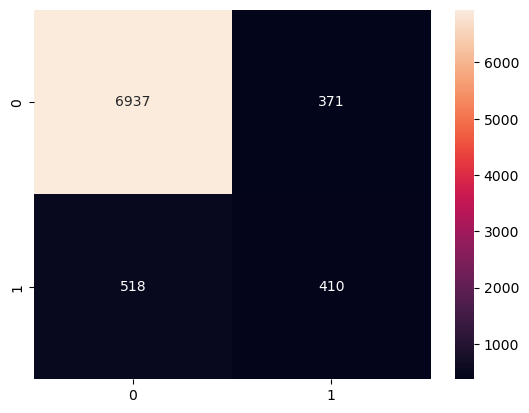

In [37]:
sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, fmt='d')

## Methodology

### Modeling

### Analysis

## Conclusion and Recommendation

### Conclusion

### Recommendation